# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_raw.munResLat.dtype

dtype('float64')

In [5]:
sinasc = sinasc_raw.set_index('munResLat')
mapping = {-8.76888:'Abaixo de -10.5' ,
           -9.90846:'Abaixo de -10.5' ,
           -10.43595:'Abaixo de -10.5' ,
           -10.72357:'Acima de -10.5' ,
           -10.77388 : 'Acima de -10.5' ,
           -11.43387:'Acima de -10.5' ,
           -11.67754:'Acima de -10.5' ,
}
sinasc.groupby(mapping)['munResAlt', 'munResArea'].agg(['sum', 'min', 'max', 'median', 'mean', 'var', 'std'])


<ipython-input-5-8f191bac40a6>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc.groupby(mapping)['munResAlt', 'munResArea'].agg(['sum', 'min', 'max', 'median', 'mean', 'var', 'std'])


munResAlt                                                \
                      sum    min    max median        mean          var   
munResLat                                                                 
Abaixo de -10.5  383934.0  139.0  163.0  139.0  147.101149   128.848331   
Acima de -10.5   620659.0  133.0  252.0  177.0  182.439447  1473.281396   

                              munResArea                                 \
                       std           sum       min        max    median   
munResLat                                                                 
Abaixo de -10.5  11.351138  1.024732e+07  2944.128   4426.571  4426.571   
Acima de -10.5   38.383348  2.971129e+07  1969.850  24855.724  3792.998   

                                                         
                        mean           var          std  
munResLat                                                
Abaixo de -10.5  3926.175489  4.916005e+05   701.142288  
Acima de -10.5   8733.477119  7.916293e+07  8897.355257

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc2 = sinasc_raw.set_index('munResArea')
mapping = {
    6896.648 : 'Acima 3 mil',
    10071.643 : 'Acima 3 mil',
    1457.888 : 'Abaixo 3 mil',
    1314.352 : 'Abaixo 3 mil',
    24855.724 : 'Acima 3 mil',
    2783.300 : 'Abaixo 3 mil',
}

sinasc2.groupby(mapping)['HORANASC', 'CONSULTAS'].agg(['sum', 'min', 'mean', 'max', 'median', 'std', 'var'])

<ipython-input-6-18645c8af02d>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc2.groupby(mapping)['HORANASC', 'CONSULTAS'].agg(['sum', 'min', 'mean', 'max', 'median', 'std', 'var'])


HORANASC                                                \
                    sum  min         mean     max  median         std   
munResArea                                                              
Abaixo 3 mil  1608496.0  9.0  1298.221146  2352.0  1327.0  500.138126   
Acima 3 mil   4236992.0  0.0  1249.850147  2358.0  1215.0  601.646095   

                            CONSULTAS                                     \
                        var       sum min      mean max median       std   
munResArea                                                                 
Abaixo 3 mil  250138.144916      4594   1  3.692926   4    4.0  0.638468   
Acima 3 mil   361978.024159     12030   1  3.543446   9    4.0  0.777244   

                        
                   var  
munResArea              
Abaixo 3 mil  0.407641  
Acima 3 mil   0.604108

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc3 = sinasc_raw.set_index('munResAlt')
mapping = {
   85.0 :'Baixa Altitude',
   227.0:'Media Altitude',
   595.0 :'Alta Altitude',
   263.0 : 'Media Altitude',
   139.0 : 'Baixa Altitude',
   87.0 : 'Baixa Altitude',
   157.0 : 'Media Altitude',
   419.0 : 'Alta Altitude',
   397.0 : 'Alta Altitude',

}

sinasc3.groupby(mapping)['CONSULTAS', 'QTDFILVIVO'].agg(['sum', 'min', 'mean', 'max', 'std', 'median','var'])

<ipython-input-7-625fffafaf0a>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc3.groupby(mapping)['CONSULTAS', 'QTDFILVIVO'].agg(['sum', 'min', 'mean', 'max', 'std', 'median','var'])


CONSULTAS                                               \
                     sum min      mean max       std median       var   
munResAlt                                                               
Alta Altitude       7376   1  3.767109   9  0.631243    4.0  0.398468   
Baixa Altitude     35625   1  3.391888   9  0.940680    4.0  0.884878   
Media Altitude     14054   1  3.702318   9  0.625674    4.0  0.391468   

               QTDFILVIVO                                                  
                      sum  min      mean   max       std median       var  
munResAlt                                                                  
Alta Altitude      1792.0  0.0  0.918974  10.0  1.028381    1.0  1.057567  
Baixa Altitude    10633.0  0.0  1.138071  12.0  1.209481    1.0  1.462844  
Media Altitude     3674.0  0.0  0.974277  12.0  1.042149    1.0  1.086076

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

> Bloco com recuo



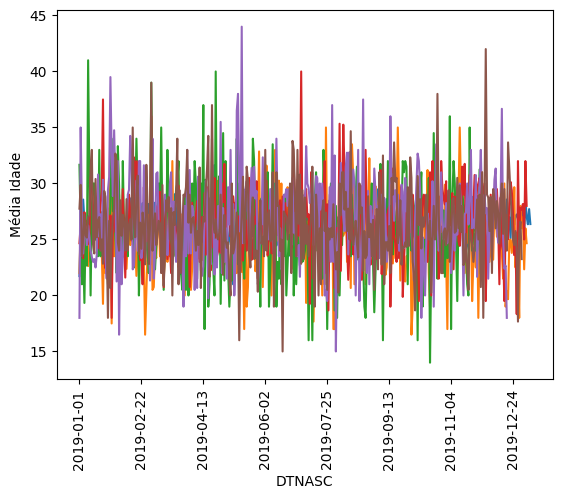

In [19]:
regioes_imediatas = ['Porto Velho', 'Ariquemes', 'Jaru', 'Ji-Paraná', 'Cacoal', 'Vilhena']

dados_filtrados = sinasc[sinasc['munResNome'].isin(regioes_imediatas)]

media_idade = dados_filtrados.groupby(['munResNome', 'DTNASC'])['IDADEMAE'].agg('mean')

for municipio in regioes_imediatas:
    dados_municipio = dados_filtrados[dados_filtrados['munResNome'] == municipio]
    media_idade = dados_municipio.groupby('DTNASC')['IDADEMAE'].mean()
    media_idade.plot()
    
plt.ylabel('Média Idade')
plt.xticks(rotation=90)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
 idh = sinasc.set_index('munResNome')
 mapping = {
    'Cacoal' : 'Idh Alto',
    'Jaru' : 'Idh Medio',
    'Vilhena' : 'Idh Alto',
    "Espigão D'Oeste" : 'Idh Medio',
    "Machadinho D'Oeste" : 'Idh Baixo',
    'Seringueiras' : 'Idh Baixo',
    'Vale do Anari' : 'Idh Baixo',
    'Castanheiras	' : 'Idh Medio',
    'Rolim de Moura	' : 'Idh Alto'
 }
 idh = idh.rename_axis('Faixas de IDH', axis='index')
 idh.groupby(mapping)['IDADEMAE'].agg([('Idade minima', 'min'), ('Idade media','mean'), ('Idade maxima','max')])

,Idade minima,Idade media,Idade maxima
Faixas de IDH,,,
Idh Alto,14,26.645412,47
Idh Baixo,13,25.429698,44
Idh Medio,12,26.020285,45


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [33]:
ifdm = sinasc.set_index('munResNome')
mapping = { 
    'Ariquemes': 'IFDM Moderado',
    'Vilhena': 'IFDM Moderado',
    "Espigão d'Oeste": 'IFDM Regular',
    'Itapuã do Oeste': 'IFDM Regular',
    'Cabixi': 'IFDM Regular',
    'Parecis': 'IFDM Regular',
    'Ji-Paraná': 'IFDM Moderado',
    'Rolim de Moura': 'IFDM Moderado',
}

ifdm = ifdm.rename_axis('Faixas de IFDM', axis='index')
ifdm.groupby(mapping)['IDADEMAE'].agg([('Idade minima', 'min'), ('Idade media','mean'), ('Idade maxima','max')])

,Idade minima,Idade media,Idade maxima
Faixas de IFDM,,,
IFDM Moderado,12,26.211108,46
IFDM Regular,13,26.128755,46


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [32]:
pib = sinasc.set_index('munResNome')
mapping = {
    'Porto Velho' : 'Acima de 1 bilhão',
    'Ji-Paraná' : 'Acima de 1 bilhão',
    'Guajará-Mirim' : 'Acima de 500 milhões',
    'Buritis' : 'Acima de 500 milhões',
    'Alta Floresta do Oeste' : 'Acima de 300 milhões',
    'Cujubim' : 'Acima de 300 milhões',
    'Monte Negro' : 'Acima de 200 milhões',
    'Alvorada do Oeste' : 'Acima de 200 milhões',
    'Corumbiara' : 'Acima de 100 milhões',
    'Urupá' : 'Acima de 100 milhões',
    'Nova União' : 'Até 100 milhões',
    'Castanheiras' : 'Até 100 milhões',
}
pib = pib.rename_axis('Faixas do PIB', axis='index')
pib.groupby(mapping)['IDADEMAE'].agg([('Idade minima', 'min'), ('Idade media','mean'), ('Idade maxima','max')])

,Idade minima,Idade media,Idade maxima
Faixas do PIB,,,
Acima de 1 bilhão,12,26.322629,47
Acima de 100 milhões,15,25.845118,43
Acima de 200 milhões,14,25.648241,40
Acima de 300 milhões,14,24.482927,42
Acima de 500 milhões,13,25.503666,44
Até 100 milhões,16,26.985294,39


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

 Quanto maior o IDH maior é a idade media das mães e Quanto maior o PIB maior é a variação entre a idade minima e a maxima das mães